# 1. Read images for notebook

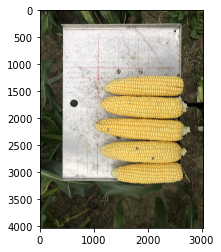

In [1]:
#The following code snip-it downloads a file from internet and saves it to your local directory.
%matplotlib inline
import numpy as np
from scipy import misc, ndimage
from imageio import imread
import matplotlib.pylab as plt

file_name = 'IMG_8342'

file1 = './data/'+file_name+'.jpg'

im = imread(file1)

plt.imshow(im)

# 2. Automated Colony counting
The following code attempts to automatically count the colonies in petri dish 1. The code has four basic parts:

1. Background Subtraction - Remove everything that is not the petri dish.
2. Colony Selection - Separate the colonies from the dish.
3. Count Blobs - Use the labeling algorithm to count the colonies.
4. Graph Results - Compare Manual Selection with Automated selection.

You will modify the code as you see fit to clean up the segmentation and get the most accurate count.  


### Step 1. Background Subtraction
Notice in the first image (im1) the background near the top of the image outside of the pitri dish has a color similar to the colonies of interest.  The first thing we are going to do is create a mask identify everyting outisde of the pitri dish so we can easily ignore it later.  Notice that a simple color threshold of 133 results in true mostly outside of the dish and false inside of the dish:

### Simple color threshold

Text(0.5, 1.0, 'Masked Image')

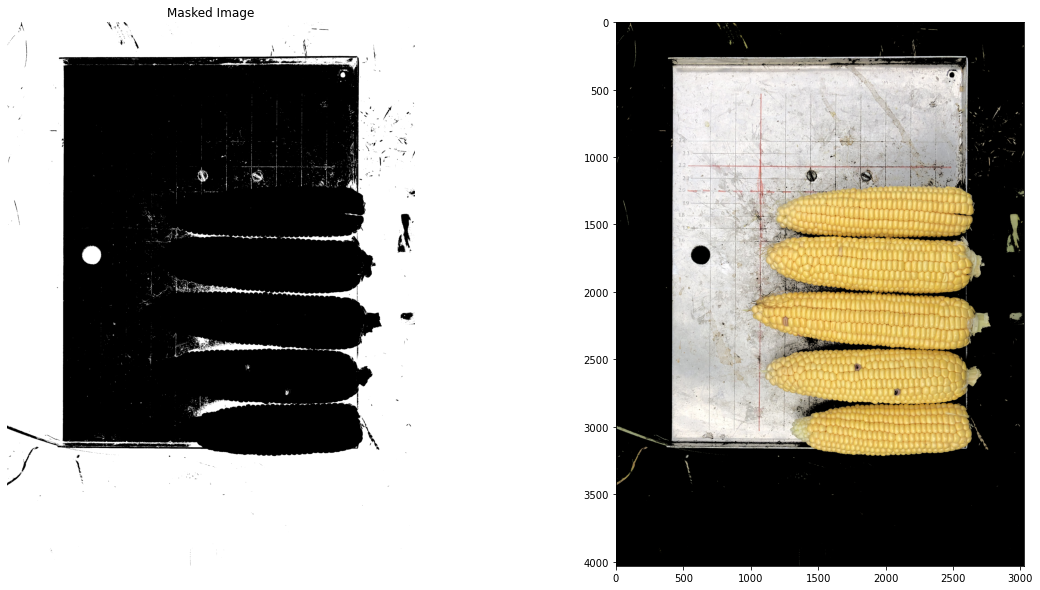

In [2]:
rmax=133
background_mask = im[:,:,0] < rmax 

# Remove the background_mask from the original image
forground_im = im.copy()
forground_im[background_mask,:] = 0

#Plot the results side-by-side with the original image
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(background_mask, cmap='gray')
ax1.set_title('Background Mask')
ax1.axis('off')
ax2.imshow(forground_im)
ax1.set_title('Masked Image')

### Crop mask

We still have some large errors at the top.  We could just chop off this part of the image by setting all of the image rows less than 90 to true:  

Text(0.5, 1.0, 'Masked Image')

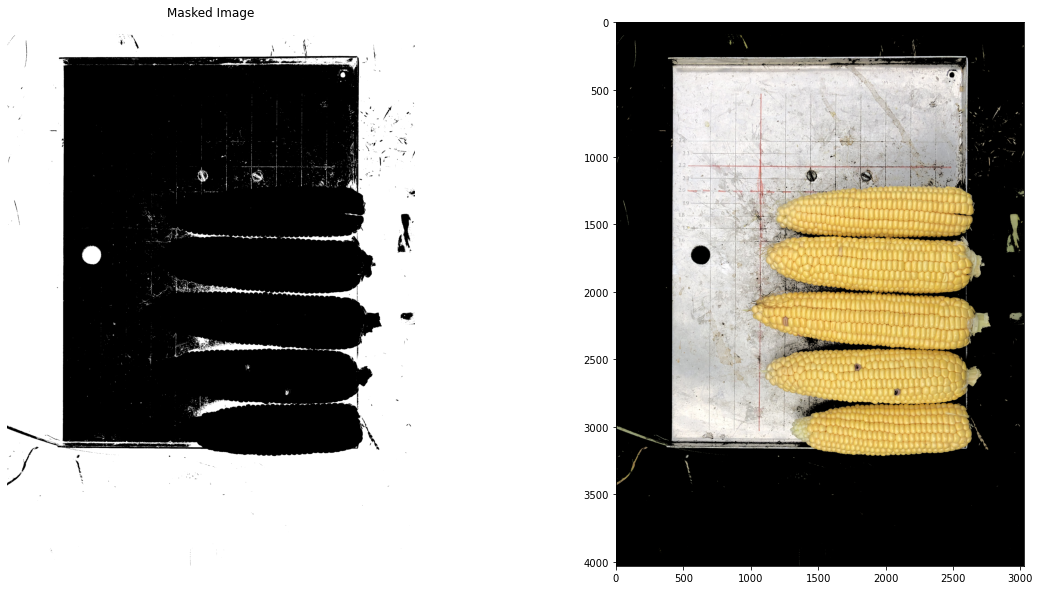

In [3]:
# Trick to trim off top of dish
background_mask[0:90,:] = 1

# Remove the background_mask from the original image
forground_im = im.copy()
forground_im[background_mask,:] = 0

#Plot the results side-by-side with the original image
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(background_mask, cmap='gray')
ax1.set_title('Background Mask')
ax1.axis('off')
ax2.imshow(forground_im)
ax1.set_title('Masked Image')

### Clean up the noise

Now we can use dilation to get rid of the small black dots in the mask.  

Text(0.5, 1.0, 'Masked Image')

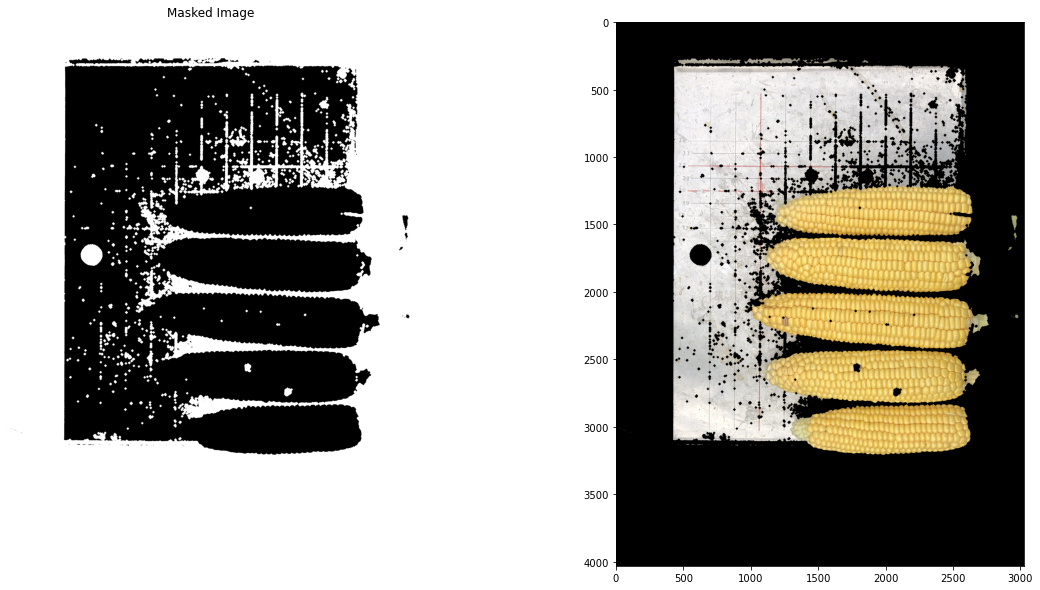

In [4]:
from scipy import ndimage

after_dilation = ndimage.binary_dilation(background_mask, iterations=10)


# Remove the background_mask from the original image
forground_im = im.copy()
forground_im[after_dilation,:] = 0

#Plot the results side-by-side with the original image
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(after_dilation, cmap='gray')
ax1.set_title('Background Mask')
ax1.axis('off')
ax2.imshow(forground_im)
ax1.set_title('Masked Image')

### Step 2. Colony Selection

Using the background mask from above we can now focus only on the petri dish.  This code tries to segment out both the TypeA and TypeB colonies.

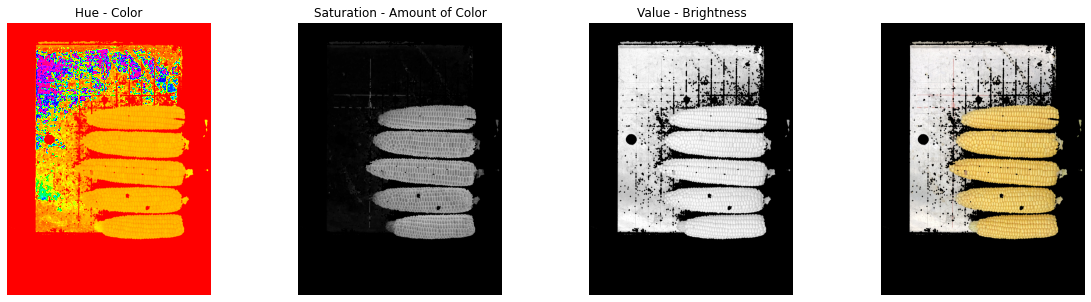

In [5]:
im = forground_im
#Code snipit from previous class to show image as HSV
import colorsys
import matplotlib.colors as colors

hsv = colors.rgb_to_hsv(im)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.imshow(hsv[:,:,0], cmap='hsv')
ax1.set_title('Hue - Color')
ax1.set_axis_off()

ax2.imshow(hsv[:,:,1],cmap='gray',vmin=0, vmax=1)
ax2.set_title('Saturation - Amount of Color')
ax2.set_axis_off()

ax3.imshow(hsv[:,:,2],cmap='gray')
ax3.set_title('Value - Brightness')
ax3.set_axis_off()

ax4.imshow(im)
ax4.set_axis_off()

In [6]:
#Code snipit from previous class to find best thresholds for HSV Colorspace
from ipywidgets import interactive,fixed

def hsv_color_threshold(im, hmin=-0.01,hmax=1.01, smin=-0.01,smax=1.01,vmin=-1,vmax=256):
    # Pull out the red, gree and blue matrixes
    hsv = colors.rgb_to_hsv(im)
    h = hsv[:,:,0];
    s = hsv[:,:,1];
    v = hsv[:,:,2];
    
    # trick because the color space wraps
    if hmin > hmax:
        b_img = (h > hmin) | (h < hmax)
    else:
        b_img = (h > hmin) & (h < hmax);
    
    
    b_img = (b_img & 
         (s > smin) & (s < smax) & 
         (v > vmin) & (v < vmax));
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    ax1.imshow(im)
    ax1.set_axis_off()
    
    ax2.imshow(b_img,cmap='gray', vmin=0, vmax=1)
    ax2.set_title('Value - Brightness')
    ax2.set_axis_off()

    plt.show()
    return b_img*1;

slider_widget = interactive(hsv_color_threshold, im=fixed(im),
                            hmin=(-0.01,1.01,0.01), hmax=(-0.01,1.01,0.01), 
                            smin=(-0.01,1.01,0.01), smax=(-0.01,1.01,0.01), 
                            vmin=(-1,256), vmax=(-1,256),__manual=True);
slider_widget

interactive(children=(FloatSlider(value=-0.01, description='hmin', max=1.01, min=-0.01, step=0.01), FloatSlide…

In [ ]:
#THis code pulls out the thresholds from the slider widget used above
hmin = slider_widget.children[0].value
hmax = slider_widget.children[1].value
smin = slider_widget.children[2].value
smax = slider_widget.children[3].value
vmin = slider_widget.children[4].value
vmax = slider_widget.children[5].value

print('hmin=',hmin)
print('hmax=',hmax)
print('smin=',smin)
print('smax=',smax)
print('vmin=',vmin)
print('vmax=',vmax)


# Here is the parameters I used

In [7]:
# Type your thresholds here so you can remember what you picked (should be able to just copy and paste from above)
hmin= -0.01
hmax= 0.14
smin= 0.26
smax= 1.01
vmin= 232
vmax= 256

(-0.5, 3023.5, 4031.5, -0.5)

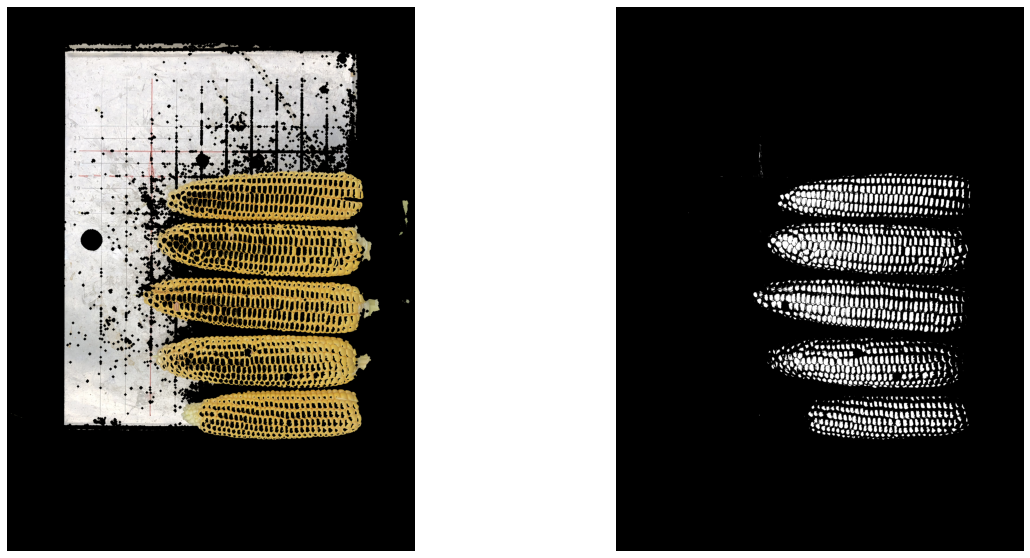

In [8]:
# Code to visualize the segmentation from above
hsv = colors.rgb_to_hsv(im)

h1 = hsv[:,:,0] > hmin 
h2 = hsv[:,:,0] < hmax 
s1 = hsv[:,:,1] > smin
s2 = hsv[:,:,1] < smax
v1 = hsv[:,:,2] > vmin
v2 = hsv[:,:,2] < vmax

binary_image = h1 & h2 & s1 & s2 & v1 & v2 & ~(after_dilation)


im_background = im.copy()
im_background[binary_image] = 0

#Plot the results side-by-side with the original image
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(im_background)
ax1.axis('off')
ax2.imshow(binary_image, cmap='gray')
ax2.axis('off')

### Clean up the noise

Remove speckle noise using dilation and Erosion

(-0.5, 3023.5, 4031.5, -0.5)

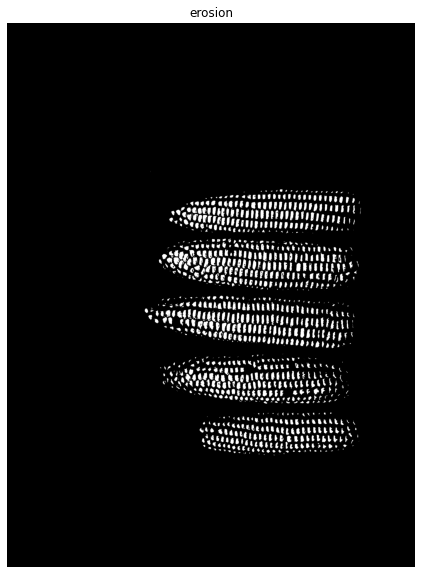

In [10]:

after_erosion  = ndimage.binary_erosion(binary_image, iterations=2)

#Plot the results side-by-side with the original image
f, (ax1) = plt.subplots(1, 1,figsize=(20,10))

ax1.imshow(after_erosion, cmap='gray')
ax1.set_title('erosion')
ax1.axis('off')


### Check results

Which colonies did we miss?

(-0.5, 3023.5, 4031.5, -0.5)

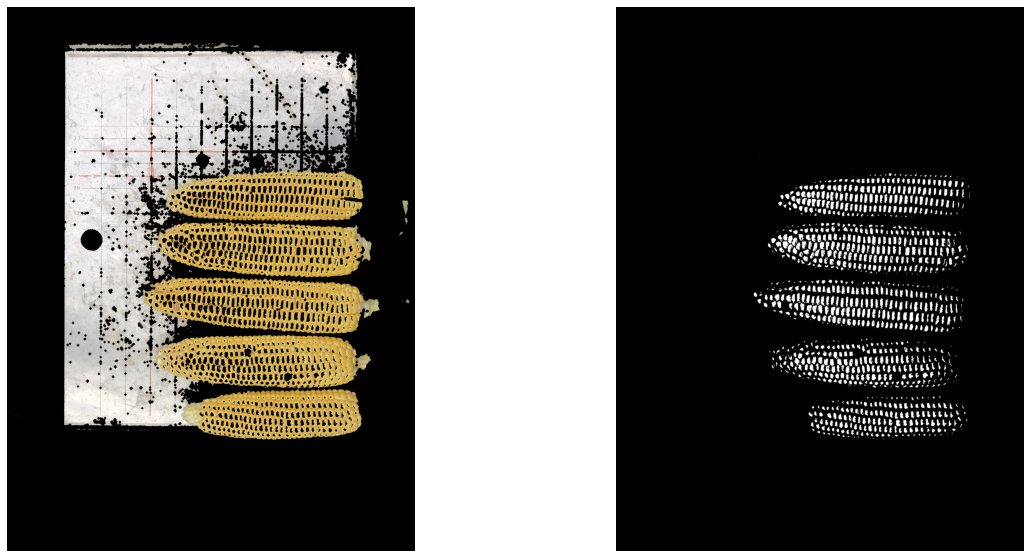

In [11]:
im_background = im.copy()
im_background[after_erosion] = 0

#Plot the results side-by-side with the original image
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(im_background, cmap='gray')
ax1.axis('off')
ax2.imshow(after_erosion, cmap='gray')
ax2.axis('off')



### Step 3. Object Counting

We can count the number of objects in the image using the label function inside of ```ndimage.measurements``` library:

Text(0.5, 1.0, 'A Total of 2283 kernels found')

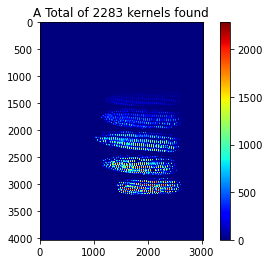

In [12]:
lab, num_features = ndimage.measurements.label(after_erosion)
plt.imshow(lab, cmap='jet')
plt.colorbar()
plt.title('A Total of '+str(num_features)+' kernels found')
#plt.savefig('erosion_kernel.png')

### Remove the clusters with the number of connected pixels less than 5 or greater than 10,000

In [13]:
# eliminate the connected pixels smaller than some threshold
label_size = []
for single_label in range(1, num_features+1):
    label_size.append((lab == single_label).sum())

Text(0.5, 1.0, 'Histogram of # of pixels of the connected clusters')

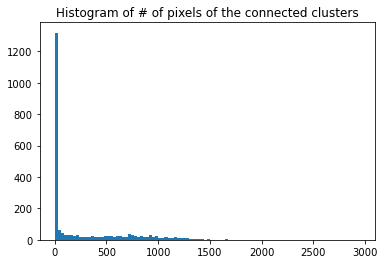

In [14]:
plt.hist(label_size, bins=100)
plt.title('Histogram of # of pixels of the connected clusters')
#plt.savefig(file_name+'_number_pixels.png')

In [15]:
final_image = (after_erosion).copy()
for idx, size in enumerate(label_size):
    single_label = idx+1
    if size < 5 or size > 10000:
        final_image[lab==single_label] = 0

Text(0.5, 1.0, 'A Total of 1162 kernels found \n after pixel size filtered')

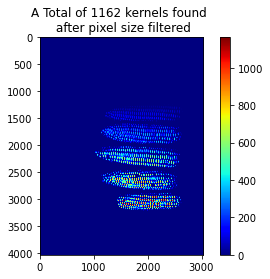

In [16]:
lab_filter, num_features_filter = ndimage.measurements.label(final_image)
plt.imshow(lab_filter, cmap='jet')
plt.colorbar()
plt.title('A Total of '+str(num_features_filter)+' kernels found \n after pixel size filtered')
#plt.savefig(file_name+'_threshold_kernel.png')